In [1227]:
%run code/import_libs.py
%run code/functions.py
%run code/Build_Forms.py
%run code/initial_data_prep.py

%matplotlib inline



In [1228]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [1235]:
%run code/initial_data_prep.py
#FILTER

df=df[df['yr_built']>1981]
#df=df[df['price']<800000].copy()
#df=df[df['sqft_living']<3000].copy()
df=df[df['sqft_lot']<100000].copy()

df=df[~df["grade"].isin([3,4,5])]


initial_pred = df.drop(columns=["price"]).copy()
initial_price = df[["price"]]

df.shape

(8365, 28)

In [1236]:
x1, y1 = transform_data(initial_pred, initial_price)



#x1['interact3']=x1['sqft_living']*df['condition']
#x1['interact5']=x1['sqft_living']*x1['grade']
#x1['interact6']= x1['sqft_living']*x1['sqft_lot']
#x1['interact7']=x1['grade']**2

#x1['condition']=df['condition']
#x1['basement']=df['basement']
#x1['interact8']=x1['sqft_living']*df['sqft_living15']
#x1['interact9']= df['sqft_basement']

#x1['interact8']=df['bathrooms']*df['grade']
#x1['price_per_sqft']=df['price_per_sqft']
#x1.drop('grade',axis=1,inplace=True)

#x1['interact6']=df['grade']*df['after_1980']
#x1['interact7']=df['bedrooms']*df['basement']

#x1['year']=x1['year']**2


In [1237]:
pred=x1
price=y1
pred_int = sm.add_constant(pred)
model = sm.OLS(price,pred_int).fit()
print(model.rsquared)

#list(model.pvalues[model.pvalues > 0.05].index)



#(x1['zip_98092'].sum() + x1['zip_98002'].sum() + x1['zip_98003'].sum() + x1['zip_98032'].sum())/len(x1)

#x1['zip_98032'].sum()
model.summary()

0.9168310702944129


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.917
Model:                            OLS   Adj. R-squared:                  0.916
Method:                 Least Squares   F-statistic:                     1202.
Date:                Thu, 31 Mar 2022   Prob (F-statistic):               0.00
Time:                        02:22:55   Log-Likelihood:                 4305.9
No. Observations:                8365   AIC:                            -8458.
Df Residuals:                    8288   BIC:                            -7916.
Df Model:                          76                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           6.7902      0.110     61.461      0.000       6.574       7.007
Grade_Cond     -0.0119      0.004     -3.007      0.003      -0.020      -0.004
sqft_living     0.5580      0.007     77.198      0.000       0.544       0.572
sqft_lot        0.0513      0.003     18.752      0.000       0.046       0.057
zip_98002       0.0327      0.021      1.527      0.127      -0.009       0.075
zip_98003      -0.0034      0.018     -0.192      0.848      -0.038       0.031
zip_98004       1.0935      0.019     58.135      0.000       1.057       1.130
zip_98005       0.7497      0.032     23.143      0.000       0.686       0.813
zip_98006       0.6260      0.015     40.904      0.000       0.596       0.656
zip_98007       0.6406      0.027     23.862      0.000       0.588       0.693
zip_98008       0.6978      0.035     19.987      0.000       0.629       0.766
zip_98010       0.1394      0.026      5.345      0.000       0.088       0.191
zip_98011       0.4167      0.018     22.800      0.000       0.381       0.453
zip_98014       0.2638      0.023     11.427      0.000       0.219       0.309
zip_98019       0.2920      0.017     17.619      0.000       0.260       0.324
zip_98022       0.0139      0.019      0.736      0.462      -0.023       0.051
zip_98023      -0.0408      0.015     -2.698      0.007      -0.070      -0.011
zip_98024       0.3748      0.042      8.961      0.000       0.293       0.457
zip_98027       0.5301      0.015     35.708      0.000       0.501       0.559
zip_98028       0.4119      0.017     23.945      0.000       0.378       0.446
zip_98029       0.5875      0.014     41.981      0.000       0.560       0.615
zip_98030       0.0304      0.016      1.920      0.055      -0.001       0.061
zip_98031       0.0663      0.016      4.044      0.000       0.034       0.098
zip_98032      -0.0183      0.043     -0.423      0.673      -0.103       0.067
zip_98033       0.7701      0.015     50.082      0.000       0.740       0.800
zip_98034       0.5613      0.016     34.294      0.000       0.529       0.593
zip_98038       0.1417      0.013     11.075      0.000       0.117       0.167
zip_98039       1.2912      0.035     37.066      0.000       1.223       1.359
zip_98040       0.8861      0.022     40.833      0.000       0.844       0.929
zip_98042       0.0538      0.014      3.929      0.000       0.027       0.081
zip_98045       0.3044      0.018     16.881      0.000       0.269       0.340
zip_98052       0.6175      0.014     44.409      0.000       0.590       0.645
zip_98053       0.5905      0.014     43.285      0.000       0.564       0.617
zip_98055       0.1333      0.019      7.146      0.000       0.097       0.170
zip_98056       0.3521      0.016     22.616      0.000       0.322       0.383
zip_98058       0.1448      0.016      9.13

In [1216]:
regression = LinearRegression()
crossvalidation = KFold(n_splits=5, shuffle=True, random_state=3)

baseline = np.mean(cross_val_score(regression, x1, y1, scoring='r2', cv=crossvalidation))
baseline

0.8781257931632693

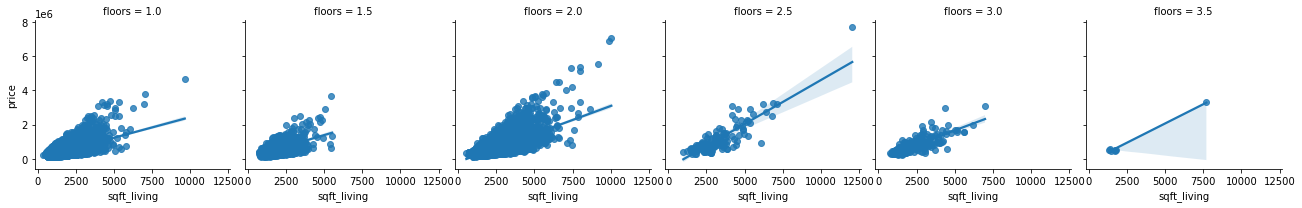

In [1173]:

transformed_df=pd.concat([initial_pred, initial_price], axis=1)
g = sns.FacetGrid(df, col="floors") 
g.map(sns.regplot, "sqft_living", "price")



In [982]:
df.grade.astype('category')

id
7129300520    7
6414100192    7
5631500400    6
2487200875    7
1954400510    8
             ..
263000018     8
6600060120    8
1523300141    7
291310100     8
1523300157    7
Name: grade, Length: 20880, dtype: category
Categories (8, int64): [6, 7, 8, 9, 10, 11, 12, 13]